In [2]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
from single_data_processing import SingleAssetTI
import itertools
import yfinance as yf
from pso import PortfolioPSO
from model_comparator import ModelComparator
from island_ga import IslandGGA
from single_data_processing import SingleAssetTI

import datetime

In [3]:
#GROUPON 
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period =2019
pSize = 150
num_iter = 50
num_runs = 10
ticker = 'AAPL'


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


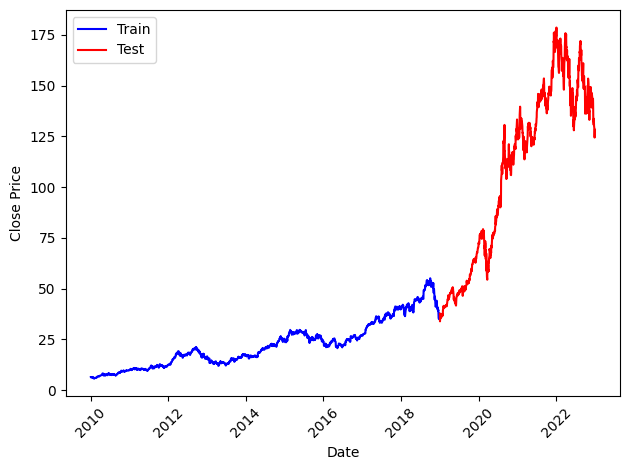

Running model:  ring
Running ring
Generation 1: Best fitness = 6.122868186746644  Average Fitness = 5.812066608544071
Generation 2: Best fitness = 6.122868186746644  Average Fitness = 5.9928136802437555
Generation 3: Best fitness = 6.122868186746644  Average Fitness = 6.031040538184418
Generation 4: Best fitness = 6.122868186746644  Average Fitness = 6.064468114923673
Generation 5: Best fitness = 6.122868186746644  Average Fitness = 6.070850200685512
Generation 6: Best fitness = 6.122868186746644  Average Fitness = 6.07892736677186
Generation 7: Best fitness = 6.122868186746644  Average Fitness = 6.075323578072656
Generation 8: Best fitness = 6.122868186746644  Average Fitness = 6.075106180900671
Generation 9: Best fitness = 6.122868186746644  Average Fitness = 6.058595240791729
Generation 10: Best fitness = 6.122868186746644  Average Fitness = 6.07892736677186
Island 0 Migration - Left 9 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Mig

[*********************100%***********************]  1 of 1 completed


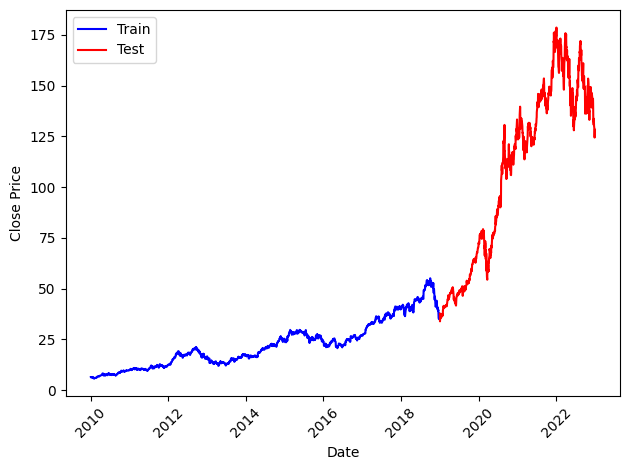

Running model:  ring
Running ring
Generation 1: Best fitness = 6.122868186746644  Average Fitness = 5.73029638666983
Generation 2: Best fitness = 6.122868186746644  Average Fitness = 5.9679709684627795
Generation 3: Best fitness = 6.122868186746644  Average Fitness = 6.005590892443076
Generation 4: Best fitness = 6.122868186746644  Average Fitness = 6.009458172777236
Generation 5: Best fitness = 6.122868186746644  Average Fitness = 6.038579073958302
Generation 6: Best fitness = 6.122868186746644  Average Fitness = 6.043382370183375
Generation 7: Best fitness = 6.122868186746644  Average Fitness = 6.046193995602674
Generation 8: Best fitness = 6.122868186746644  Average Fitness = 6.075812087689917
Generation 9: Best fitness = 6.122868186746644  Average Fitness = 6.078921919827463
Generation 10: Best fitness = 6.122868186746644  Average Fitness = 6.078927366771859
Island 0 Migration - Left 9 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Mi

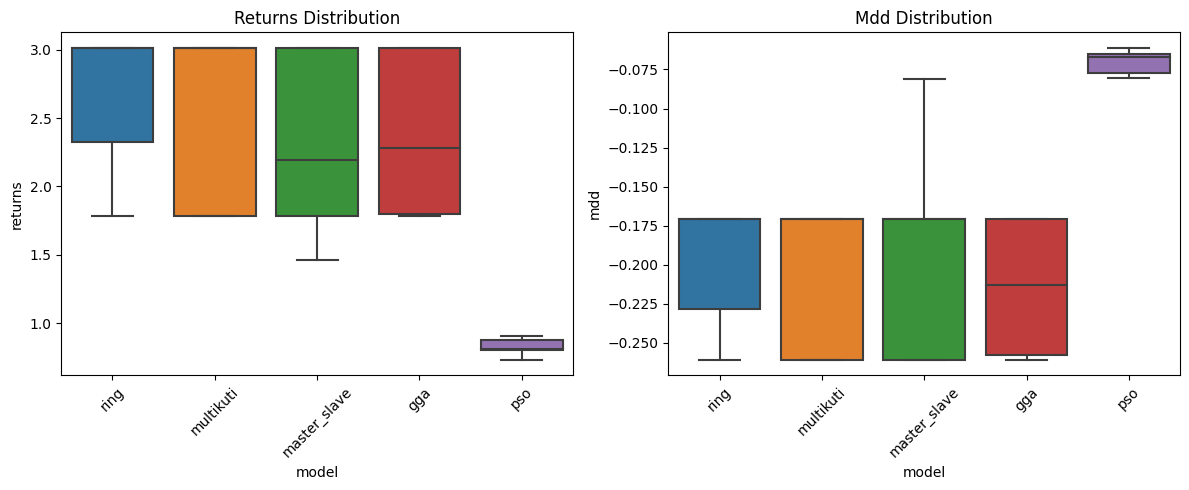

In [4]:
# Usage
import traceback

try:
    # Code that raises the error
    np.random.seed(42)
    comparator = ModelComparator(stock_ticker=ticker,start_date=start_date, end_date=end_date, pSize=pSize, num_iter=num_iter, num_runs=num_runs)
    comparator.run_comparison()
    results_df = comparator.run_comparison()
    comparator.plot_results(results_df, comparator.optimization_approaches)
    results_df.to_csv('results/uptrend.csv')
        
except Exception as e:
    print("An error occurred:")
    traceback.print_exc()


In [5]:
results_df = pd.read_csv('results/downtrend.csv')
pd.set_option('display.max_rows', None)
results_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,-0.2381,-0.4236
master_slave,-0.1556,-0.4182
multikuti,-0.2417,-0.4549
pso,-0.4257,-0.4087
ring,-0.1928,-0.4287


In [6]:
training_df = results_df[results_df['phase'] == 'train']
training_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,0.1687,-0.3345
master_slave,0.1687,-0.3345
multikuti,0.1687,-0.3345
pso,0.0085,-0.3476
ring,0.1687,-0.3345


In [7]:
validation_df = results_df[results_df['phase'] == 'validation']
validation_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,-0.6449,-0.5128
master_slave,-0.4800,-0.5018
multikuti,-0.6522,-0.5752
pso,-0.8598,-0.4697
ring,-0.5544,-0.5229
